In [162]:
import pathlib

import pandas as pd
import numpy as np
from termcolor import colored as cl # 文本自定义

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc # 树算法
from sklearn.metrics import accuracy_score # 模型准确度
from sklearn.tree import plot_tree # 树图
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import shap

import re

In [163]:
datav1 = pd.read_csv("StdData.csv")
datav1.drop(['year'],axis = 1,inplace = True)
datav1

category   company  total_share_capital  total_reserves_and_surplus  \
0    0.807692  0.000000             0.006151                    0.503181   
1    0.807692  0.000000             0.006151                    0.502815   
2    0.538462  0.002043             0.017124                    0.508972   
3    0.538462  0.002043             0.017235                    0.519996   
4    0.538462  0.005448             0.002399                    0.496654   
..        ...       ...                  ...                         ...   
995  0.096154  0.255363             0.037632                    0.492043   
996  0.538462  0.876404             0.005622                    0.496994   
997  0.250000  0.512768             0.015390                    0.520352   
998  0.826923  0.559074             0.031887                    0.865146   
999  0.346154  0.090228             0.018736                    0.583985   

     total_shareholders_funds  long_term_borrowings  \
0                    0.514880              0.009463   
1                    0.514515              0.010349   
2                    0.525238              0.701182   
3                    0.536275              0.772071   
4                    0.506803              0.019419   
..                        ...                   ...   
995                  0.501202              0.127534   
996                  0.508488              0.000000   
997                  0.535864              0.017838   
998                  0.886643              0.136514   
999                  0.600728              0.000000   

     deferred_tax_liabilities_net  other_long_term_liabilities  \
0                        0.002110                     0.000276   
1                        0.002110                     0.000138   
2                        0.007299                     0.004175   
3                        0.006586                     0.003718   
4                        0.001876                     0.000000   
..                            ...                          ...   
995                      0.031970                     0.001902   
996                      0.001876                     0.000000   
997                      0.002691                     0.000000   
998                      0.027587                     0.002688   
999                      0.006321                     0.000000   

     long_term_provisions  total_non.current_liabilities  ...  EPS_diluted  \
0                0.002453                       0.013616  ...     0.332168   
1                0.002686                       0.014565  ...     0.333916   
2                0.003324                       0.709533  ...     0.304196   
3                0.003042                       0.778514  ...     0.351399   
4                0.000000                       0.021019  ...     0.293706   
..                    ...                            ...  ...          ...   
995              0.004330                       0.163115  ...     0.354895   
996              0.000025                       0.001768  ...     0.330420   
997              0.000135                       0.020369  ...     0.340909   
998              0.024951                       0.185243  ...     0.360140   
999              0.001779                       0.007552  ...     0.333916   

     dividendEquity  taxDividend  net_cashflow_from_operating_activities  \
0          0.000000     0.000146                                0.475849   
1          0.000000     0.000146                                0.478036   
2          0.000000     0.000146                                0.419876   
3          0.001392     0.000520                                0.340512   
4          0.000000     0.000146                                0.481151   
..              ...          ...                                     ...   
995        0.025049     0.006910                                0.598552   
996        0.000000     0.000146                                0.477836   
997        0.0015

In [164]:
train_data, test_data = train_test_split(datav1, test_size=0.2)
train_data.to_csv("train_data.csv",index=False)
test_data.to_csv("test_data.csv",index=False)
train_data.reset_index(drop = True,inplace=True)
test_data.reset_index(drop = True,inplace=True)
train_labels = train_data.pop('fraud')
test_labels = test_data.pop('fraud')
train_data

category   company  total_share_capital  total_reserves_and_surplus  \
0    0.201923  0.371467             0.011847                    0.410750   
1    0.394231  0.089207             0.064659                    0.388145   
2    0.538462  0.562819             0.064954                    0.478464   
3    0.153846  0.328907             0.027888                    0.549953   
4    0.701923  0.088866             0.004638                    0.490199   
..        ...       ...                  ...                         ...   
795  0.153846  0.094314             0.007972                    0.592892   
796  0.211538  0.019408             0.146393                    0.493723   
797  0.086538  0.314607             0.009214                    0.457316   
798  0.807692  0.518556             0.025219                    0.691000   
799  0.298077  0.489275             0.017272                    0.498998   

     total_shareholders_funds  long_term_borrowings  \
0                    0.425071              0.517687   
1                    0.424578              0.312569   
2                    0.514787              0.000755   
3                    0.570608              0.079647   
4                    0.501300              0.000020   
..                        ...                   ...   
795                  0.605116              0.086523   
796                  0.564026              0.000000   
797                  0.470415              0.015140   
798                  0.718668              0.023183   
799                  0.515353              0.000000   

     deferred_tax_liabilities_net  other_long_term_liabilities  \
0                        0.001876                     0.000000   
1                        0.001876                     0.000000   
2                        0.001876                     0.008392   
3                        0.014069                     0.008806   
4                        0.001876                     0.000000   
..                            ...                          ...   
795                      0.045142                     0.005354   
796                      0.001947                     0.000000   
797                      0.001876                     0.000000   
798                      0.001876                     0.000000   
799                      0.002070                     0.000000   

     long_term_provisions  total_non.current_liabilities  ...  EPS_basic  \
0                0.000564                       0.515949  ...   0.031469   
1                0.000000                       0.311935  ...   0.342657   
2                0.002552                       0.012457  ...   0.319930   
3                0.006624                       0.106413  ...   0.332168   
4                0.000000                       0.001768  ...   0.330420   
..                    ...                            ...  ...        ...   
795              0.000000                       0.135044  ...   0.347902   
796              0.000000                       0.001818  ...   0.330420   
797              0.000074                       0.016833  ...   0.505245   
798              0.002760                       0.027013  ...   0.335664   
799              0.000000                       0.001938  ...   0.335664   

     EPS_diluted  dividendEquity  taxDividend  \
0       0.031469        0.000000     0.000146   
1       0.342657        0.000000     0.000146   
2       0.319930        0.000000     0.000146   
3       0.332168        0.001853     0.000618   
4       0.330420        0.000000     0.000146   
..           ...             ...          ...   
795     0.347902        0.003317     0.001008   
796     0.330420        0.000000     0.000146   
797     0.505245        0.000000     0.000146   
798     0.335664        0.000000     0.000146   
799     0.335664        0.000717     0.000341   

     net_cashflow_from_operating_activities  \
0                                  0.512218   
1                                  0.48296

In [165]:
model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_data.keys())]),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(2)
    ])

In [166]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_data, train_labels ,batch_size=8 ,epochs=500, validation_split = 0.1, verbose=0)

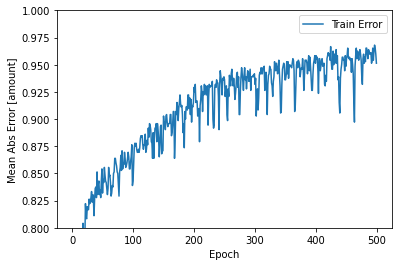

In [167]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [amount]')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Error')
    plt.ylim([0.8,1])
    plt.legend()

    plt.show()


plot_history(history)

In [168]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data)

In [169]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 4.9026 - accuracy: 0.7150 - 80ms/epoch - 11ms/step

Test accuracy: 0.7149999737739563


In [170]:
predictions_train = probability_model.predict(train_data)
predictions_test = probability_model.predict(test_data)

Result_train = pd.DataFrame(train_labels)
Result_test = pd.DataFrame(test_labels)

Result_train['prediction'] = predictions_train.tolist()
Result_test['prediction'] = predictions_test.tolist()

Result_train['myfraud'] = Result_train['prediction'].apply(lambda x: 0 if x[0]>x[1] else 1)
Result_test['myfraud'] = Result_test['prediction'].apply(lambda x: 0 if x[0]>x[1] else 1)


Result_train.reset_index(drop = True)
Result_test.reset_index(drop = True)

fraud                                 prediction  myfraud
0      0.0               [3.560207843204157e-27, 1.0]        1
1      0.0              [1.0, 1.3867501981804087e-12]        0
2      0.0  [0.9932466745376587, 0.00675335805863142]        0
3      0.0              [1.0, 1.5766424624197306e-11]        0
4      1.0               [1.369820035179714e-09, 1.0]        1
..     ...                                        ...      ...
195    1.0                                 [0.0, 1.0]        1
196    0.0              [1.0, 2.5947687127734174e-14]        0
197    1.0                [9.29099168025524e-31, 1.0]        1
198    1.0              [1.0, 1.7944982257099316e-28]        0
199    0.0              [1.0, 6.6167441395048955e-21]        0

[200 rows x 3 columns]

In [171]:
test_fraud = list(Result_test['fraud'])
test_myfraud = list(Result_test['myfraud'])

TP = tf.keras.metrics.TruePositives()
TP.update_state(test_fraud,test_myfraud)
test_TP = TP.result().numpy()

TN = tf.keras.metrics.TrueNegatives()
TN.update_state(test_fraud,test_myfraud)
test_TN = TN.result().numpy()

FP = tf.keras.metrics.FalsePositives()
FP.update_state(test_fraud,test_myfraud)
test_FP = FP.result().numpy()

FN = tf.keras.metrics.FalseNegatives()
FN.update_state(test_fraud,test_myfraud)
test_FN = FN.result().numpy()

print("test_prediction : ","TP: ",test_TP,"TN: ",test_TN,"FP: ",test_FP,"FN: ",test_FN)

test_prediction :  TP:  33.0 TN:  110.0 FP:  22.0 FN:  35.0


In [172]:
tree_model = dtc(criterion = 'entropy', max_depth = 4)
tree_model.fit(train_data, train_labels)

pred_model = tree_model.predict(test_data)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(test_labels, pred_model)), attrs = ['bold']))

Accuracy of the model is 72%


In [173]:
predictions_test = tree_model.predict(test_data)

Result_test = pd.DataFrame(test_labels)

Result_test['myfraud'] = predictions_test

Result_test.reset_index(drop = True)

fraud  myfraud
0      0.0      0.0
1      0.0      0.0
2      0.0      0.0
3      0.0      0.0
4      1.0      0.0
..     ...      ...
195    1.0      1.0
196    0.0      0.0
197    1.0      0.0
198    1.0      0.0
199    0.0      0.0

[200 rows x 2 columns]

In [174]:
test_fraud = list(Result_test['fraud'])
test_myfraud = list(Result_test['myfraud'])

TP = tf.keras.metrics.TruePositives()
TP.update_state(test_fraud,test_myfraud)
test_TP = TP.result().numpy()

TN = tf.keras.metrics.TrueNegatives()
TN.update_state(test_fraud,test_myfraud)
test_TN = TN.result().numpy()

FP = tf.keras.metrics.FalsePositives()
FP.update_state(test_fraud,test_myfraud)
test_FP = FP.result().numpy()

FN = tf.keras.metrics.FalseNegatives()
FN.update_state(test_fraud,test_myfraud)
test_FN = FN.result().numpy()

print("test_prediction : ","TP: ",test_TP,"TN: ",test_TN,"FP: ",test_FP,"FN: ",test_FN)

test_prediction :  TP:  15.0 TN:  128.0 FP:  4.0 FN:  53.0


In [175]:
import graphviz
from sklearn.tree import export_graphviz
feature_names = datav1.columns[:-1]
target_names = ['no','true']

dot_data = export_graphviz(tree_model, out_file=None,
                                feature_names=feature_names, # 特征名称
                                class_names=target_names, # 目标变量的类别名
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decisiontree.gv', directory='E:\\xhc\\pycode\\FS_Fraud', view=True)
print('Save example.gv file!\n')

Save example.gv file!



In [176]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 决策树
clf1 = DecisionTreeClassifier(max_depth=4, min_samples_split=2,random_state=0)
clf1.fit(train_data,train_labels)
pred_model = clf1.predict(test_data)
scores1 = accuracy_score(test_labels, pred_model)
print(scores1)

## 随机森林
clf2 = RandomForestClassifier(n_estimators=100, max_depth=4,min_samples_split=2, random_state=0)
clf2.fit(train_data,train_labels)
pred_model = clf2.predict(test_data)
scores2 = accuracy_score(test_labels, pred_model)
print(scores2)

## ExtraTree分类器集合
clf3 = ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=2, random_state=0)
clf3.fit(train_data,train_labels)
pred_model = clf3.predict(test_data)
scores3 = accuracy_score(test_labels, pred_model)
print(scores3)

## 梯度提升树
clf4 = GradientBoostingClassifier(max_depth=8, min_samples_split=2,random_state=0)
clf4.fit(train_data,train_labels)
pred_model = clf4.predict(test_data)
scores4 = accuracy_score(test_labels, pred_model)
print(scores4)

0.68
0.765
0.785
0.73


In [204]:
predictions_test = clf4.predict(test_data)
Result_test = pd.DataFrame(test_labels)
Result_test['myfraud'] = predictions_test
Result_test.reset_index(drop = True)

test_fraud = list(Result_test['fraud'])
test_myfraud = list(Result_test['myfraud'])

TP = tf.keras.metrics.TruePositives()
TP.update_state(test_fraud,test_myfraud)
test_TP = TP.result().numpy()

TN = tf.keras.metrics.TrueNegatives()
TN.update_state(test_fraud,test_myfraud)
test_TN = TN.result().numpy()

FP = tf.keras.metrics.FalsePositives()
FP.update_state(test_fraud,test_myfraud)
test_FP = FP.result().numpy()

FN = tf.keras.metrics.FalseNegatives()
FN.update_state(test_fraud,test_myfraud)
test_FN = FN.result().numpy()

print("test_prediction : ","TP: ",test_TP,"TN: ",test_TN,"FP: ",test_FP,"FN: ",test_FN)

test_prediction :  TP:  32.0 TN:  114.0 FP:  18.0 FN:  36.0


In [177]:
# 绘制随机森林
'''
Estimators = clf2.estimators_
for index, model in enumerate(Estimators):
    filename = 'Random_Forest' + str(index) + '.pdf'
    dot_data = export_graphviz(model , out_file=None,
                         feature_names=feature_names,
                         class_names=target_names,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render(filename, directory='E:\\xhc\\pycode\\FS_Fraud\\Random_Forest', view=True)
    print('Savefile!\n')
'''

"\nEstimators = clf2.estimators_\nfor index, model in enumerate(Estimators):\n    filename = 'Random_Forest' + str(index) + '.pdf'\n    dot_data = export_graphviz(model , out_file=None,\n                         feature_names=feature_names,\n                         class_names=target_names,\n                         filled=True, rounded=True,\n                         special_characters=True)\n    graph = graphviz.Source(dot_data)\n    graph.render(filename, directory='E:\\xhc\\pycode\\FS_Fraud\\Random_Forest', view=True)\n    print('Savefile!\n')\n"

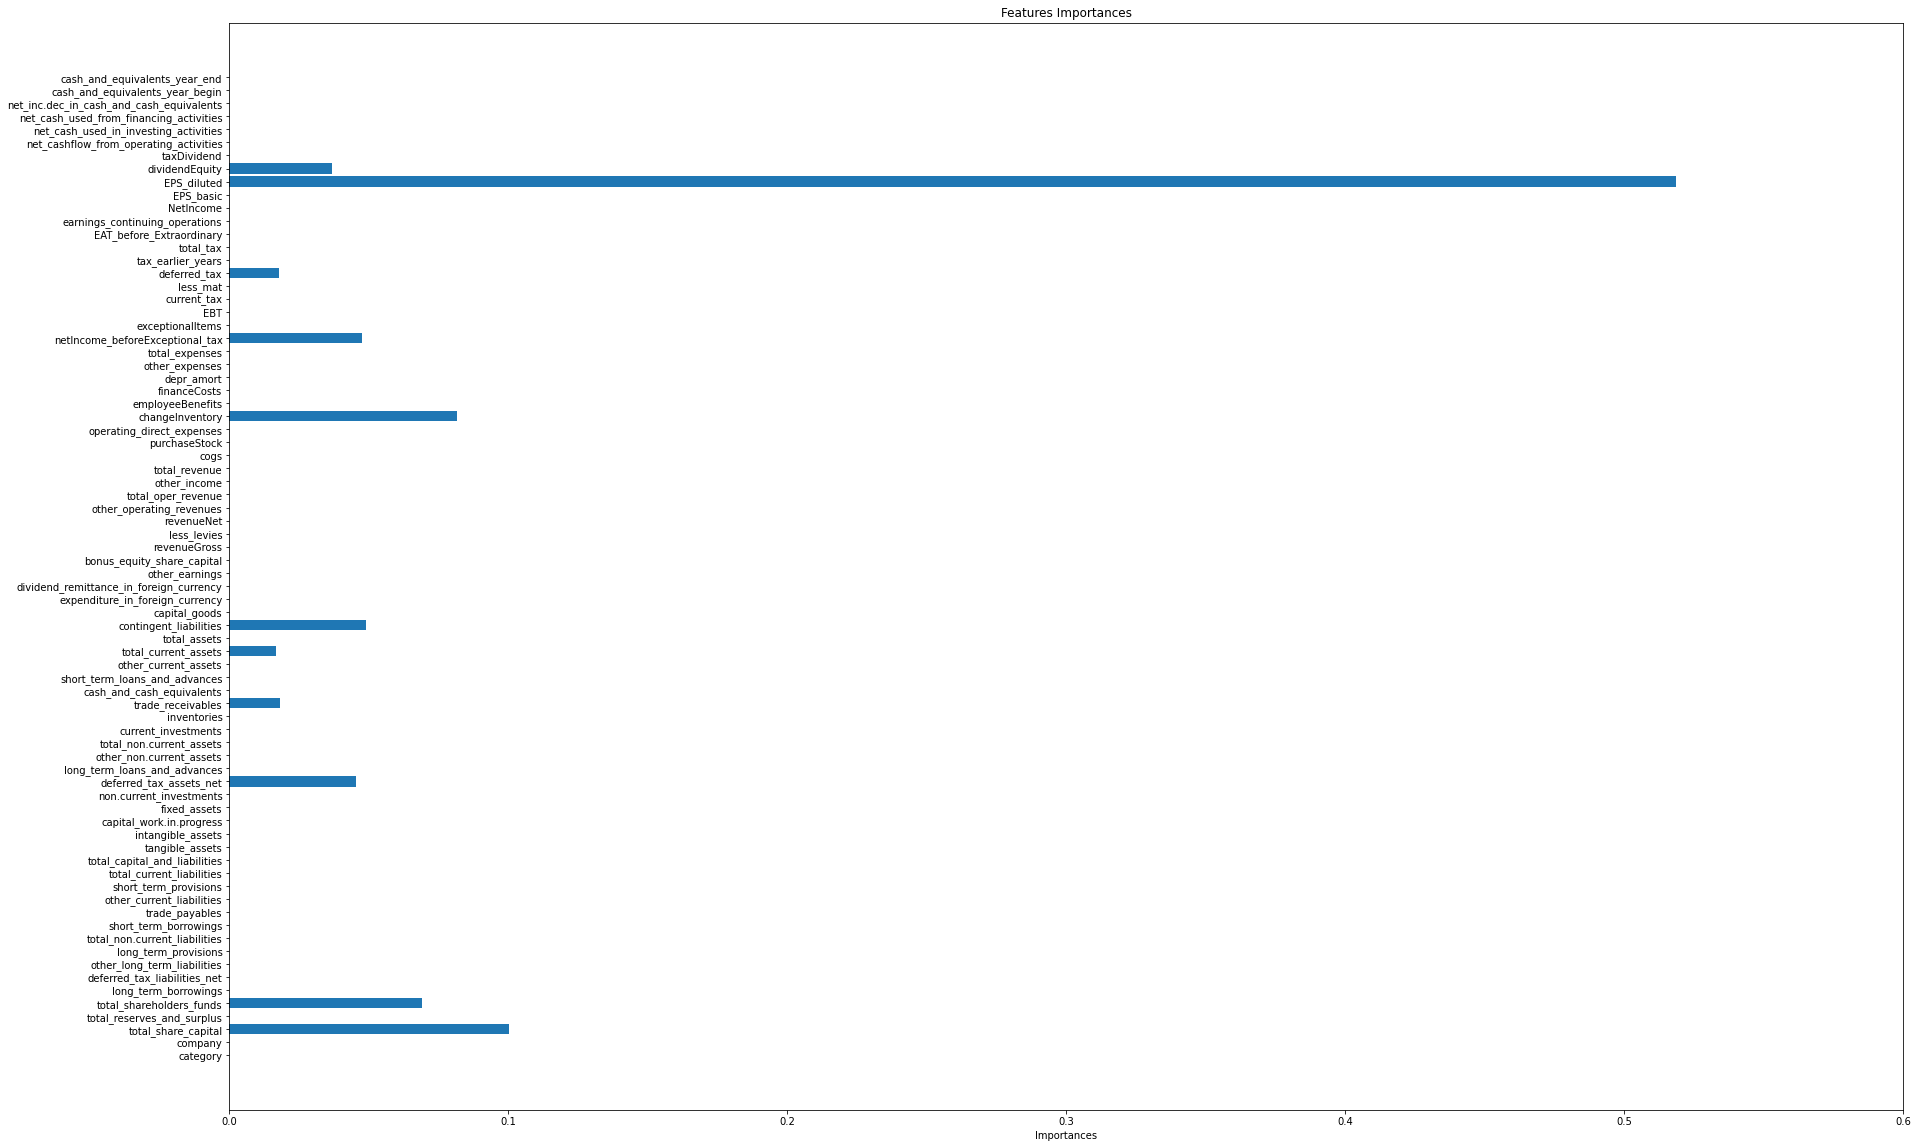

In [215]:
y_importances = clf1.feature_importances_
x_importances = feature_names
y_pos = np.arange(len(x_importances))
# 横向柱状图
plt.figure(figsize=(10,20))
plt.barh(y_pos, y_importances, align='center')
plt.yticks(y_pos, x_importances)
plt.xlabel('Importances')
plt.xlim(0,0.6)
plt.title('Features Importances')
plt.show()

In [198]:
shap.initjs()
X=train_data
explainer = shap.TreeExplainer(clf1)
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X.iloc[0,:])

In [195]:
shap.force_plot(explainer.expected_value[0], shap_values[1], X)

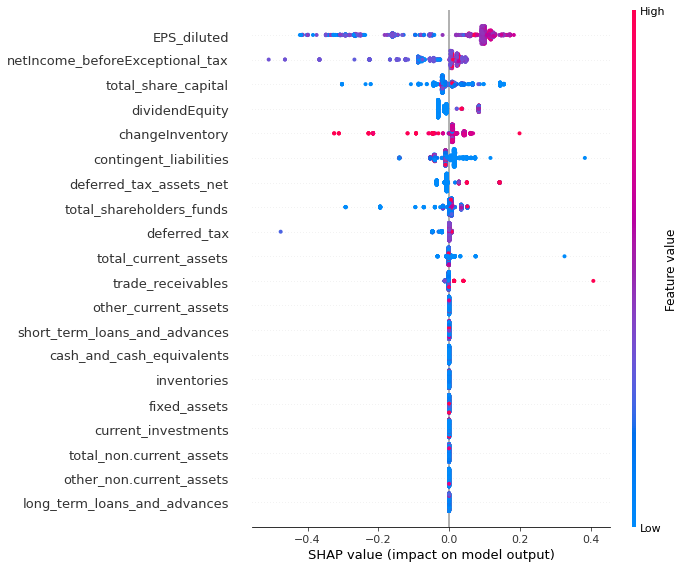

In [194]:
shap.summary_plot(shap_values[0], X)

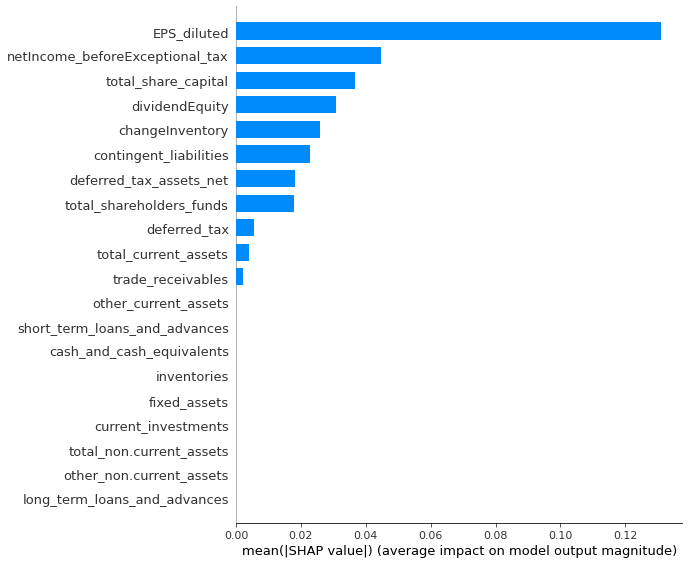

In [193]:
shap.summary_plot(shap_values[0], X,plot_type="bar")